In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv


# Data Visulization/Data Preprocessing

In [2]:
train=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
sample=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")


In [5]:
test=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
train.drop(["date_block_num"],axis=1,inplace=True)

date_block_num is not an important parameter for us,we are gonna drop that

In [8]:
train["date"]=pd.to_datetime(train["date"],infer_datetime_format=True)

To approach any time series problem our first aim is to convert Date from an object dtype to Datetime dtype

In [9]:
train=train.set_index(['date'])

Second Aim is to remove all the index and set Date column as our index variable

In [10]:
train=train[['item_cnt_day','shop_id', 'item_id', 'item_price']]

We r shuffling column(it gonna help us later)

In [11]:
train.head()

,item_cnt_day,shop_id,item_id,item_price
date,,,,
2013-02-01,1.0,59,22154,999.00
2013-03-01,1.0,25,2552,899.00
2013-05-01,-1.0,25,2552,899.00
2013-06-01,1.0,25,2554,1709.05
2013-01-15,1.0,25,2555,1099.00


In [12]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

Text(0.5, 0, 'item_cnt_day')

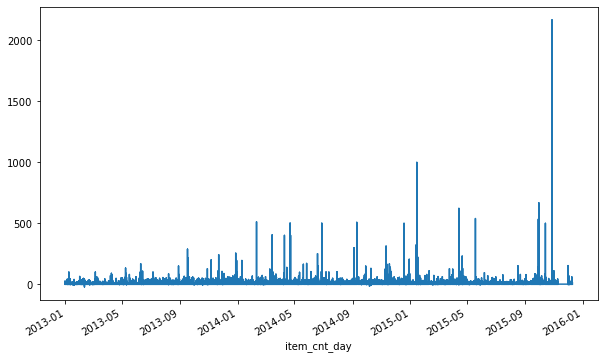

In [13]:
train["item_cnt_day"].plot()
plt.xlabel("item_cnt_day")

In [14]:
train.columns

Index(['item_cnt_day', 'shop_id', 'item_id', 'item_price'], dtype='object')

In [15]:
tr=train

In [16]:
j=1
a=['item_cnt_day', 'shop_id', 'item_id', 'item_price']
for i in a:
    tr[i+str(j)]=tr[i].shift(-1)
    

This code is generating  4 exta column (suppose our column contain entry shown below as {old column} after going through above loop the newly column generated will contain the values starting fron 2nd index of old column

Old column -------------------New column

0--------------------------1

1---------------------------2

2---------------------------NaN

In [17]:
tr

,item_cnt_day,shop_id,item_id,item_price,item_cnt_day1,shop_id1,item_id1,item_price1
date,,,,,,,,
2013-02-01,1.0,59,22154,999.00,1.0,25.0,2552.0,899.00
2013-03-01,1.0,25,2552,899.00,-1.0,25.0,2552.0,899.00
2013-05-01,-1.0,25,2552,899.00,1.0,25.0,2554.0,1709.05
2013-06-01,1.0,25,2554,1709.05,1.0,25.0,2555.0,1099.00
2013-01-15,1.0,25,2555,1099.00,1.0,25.0,2564.0,349.00
...,...,...,...,...,...,...,...,...
2015-10-10,1.0,25,7409,299.00,1.0,25.0,7460.0,299.00
2015-09-10,1.0,25,7460,299.00,1.0,25.0,7459.0,349.00
2015-10-14,1.0,25,7459,349.00,1.0,25.0,7440.0,299.00


In [18]:
tr.drop(["item_cnt_day","shop_id1","item_id1","item_price1"],axis=1,inplace=True)

We r gonna drop unneccasry column{item_cnt_day1 is gonna used as aour label}

In [19]:
tr

,shop_id,item_id,item_price,item_cnt_day1
date,,,,
2013-02-01,59,22154,999.00,1.0
2013-03-01,25,2552,899.00,-1.0
2013-05-01,25,2552,899.00,1.0
2013-06-01,25,2554,1709.05,1.0
2013-01-15,25,2555,1099.00,1.0
...,...,...,...,...
2015-10-10,25,7409,299.00,1.0
2015-09-10,25,7460,299.00,1.0
2015-10-14,25,7459,349.00,1.0


In [20]:
tr.fillna(method='ffill',inplace=True)

In [21]:
tr

,shop_id,item_id,item_price,item_cnt_day1
date,,,,
2013-02-01,59,22154,999.00,1.0
2013-03-01,25,2552,899.00,-1.0
2013-05-01,25,2552,899.00,1.0
2013-06-01,25,2554,1709.05,1.0
2013-01-15,25,2555,1099.00,1.0
...,...,...,...,...
2015-10-10,25,7409,299.00,1.0
2015-09-10,25,7460,299.00,1.0
2015-10-14,25,7459,349.00,1.0


Now we r gonna separate data into label and features and then apply MinMaxScaler

In [22]:
yy=tr["item_cnt_day1"].values

In [23]:
yy = yy.reshape((len(yy), 1))

In [24]:
tr.drop(["item_cnt_day1"],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(tr)
w=scale.transform(tr)

In [26]:
scaler=scale.fit(yy)
qq=scaler.transform(yy)

Remember above scaler we gonaa used later

In [27]:
qq

array([[0.01049749],
       [0.00958466],
       [0.01049749],
       ...,
       [0.01049749],
       [0.01049749],
       [0.01049749]])

In [28]:
www=w

# LSTM Model

In [29]:
xtrain,xtest,ytrain,ytest=www[:2348680,0:3],www[2348680:,0:3],qq[:2348680,-1],qq[2348680:,-1]

We cant use Train/Test Split in time series problem because all the label have the value dependent on prev value

    For Eg.-suppose we have to separate this data into train and test{1,2,3,4,5,6},,if we apply train test then our train data can contain{2,6,1,4} and test {5,3}

But a time Series problem requires data to be in form train={1,2,3,4} test={5,6

In [30]:
xtest

array([[0.3559322 , 0.3812531 , 0.00971164],
       [0.3559322 , 0.3812531 , 0.00971164],
       [0.3559322 , 0.3812531 , 0.00971164],
       ...,
       [0.42372881, 0.33646082, 0.00113643],
       [0.42372881, 0.33560377, 0.00097409],
       [0.42372881, 0.33650593, 0.00097409]])

In [31]:
ytest

array([0.01049749, 0.01049749, 0.01049749, ..., 0.01049749, 0.01049749,
       0.01049749])

In [32]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

LSTM model requires 3D data as input so we our converting train features and test features in 3D

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from keras.layers import Bidirectional

In [34]:
model=Sequential()
model.add(LSTM(100,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=30000,verbose=2)

Epoch 1/50
79/79 - 9s - loss: 4.6921e-06 - val_loss: 3.5898e-06
Epoch 2/50
79/79 - 9s - loss: 9.0228e-07 - val_loss: 3.5843e-06
Epoch 3/50
79/79 - 9s - loss: 8.9893e-07 - val_loss: 3.5842e-06
Epoch 4/50
79/79 - 9s - loss: 8.9682e-07 - val_loss: 3.5839e-06
Epoch 5/50
79/79 - 9s - loss: 8.9495e-07 - val_loss: 3.5839e-06
Epoch 6/50
79/79 - 10s - loss: 8.9381e-07 - val_loss: 3.5838e-06
Epoch 7/50
79/79 - 9s - loss: 8.9283e-07 - val_loss: 3.5838e-06
Epoch 8/50
79/79 - 9s - loss: 8.9207e-07 - val_loss: 3.5838e-06
Epoch 9/50
79/79 - 9s - loss: 8.9172e-07 - val_loss: 3.5837e-06
Epoch 10/50
79/79 - 9s - loss: 8.9133e-07 - val_loss: 3.5852e-06
Epoch 11/50
79/79 - 9s - loss: 8.9095e-07 - val_loss: 3.5836e-06
Epoch 12/50
79/79 - 9s - loss: 8.9077e-07 - val_loss: 3.5836e-06
Epoch 13/50
79/79 - 9s - loss: 8.9053e-07 - val_loss: 3.5835e-06
Epoch 14/50
79/79 - 9s - loss: 8.9043e-07 - val_loss: 3.5843e-06
Epoch 15/50
79/79 - 9s - loss: 8.9039e-07 - val_loss: 3.5835e-06
Epoch 16/50
79/79 - 9s - loss: 8.

In [36]:
ypred=model.predict(xtest)

In [37]:
ypred[:5]

array([[0.01057972],
       [0.01057972],
       [0.01057972],
       [0.01057972],
       [0.01057972]], dtype=float32)

In [38]:
ypred=scaler.inverse_transform(ypred)

we our using above scaler to transfrom to denormalize ypred

In [39]:
ypred

array([[1.1801689],
       [1.1801689],
       [1.1801689],
       ...,
       [1.1802586],
       [1.1802566],
       [1.1802586]], dtype=float32)

In [40]:
ytest = ytest.reshape((len(ytest), 1))

Converting 1d data to 2d

In [41]:
y_test = scaler.inverse_transform(ytest)

In [42]:
y_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [43]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

4.14798548989181

In [44]:
y_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [45]:
ypred[:5]

array([[1.1801689],
       [1.1801689],
       [1.1801689],
       [1.1801689],
       [1.1801667]], dtype=float32)

Prediction item_price for Test data

In [46]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


No to implement above model to predict item_cnt_day we need item_price in our test data,so we r gonna predict item_price first than gonna used above model to find item_cnt_day

To predict item_price all off the above process will be repeat{we will shift the features,do minmaxscaler,gonna build LSTM model again,than we will predict item_price

In [47]:
train

,shop_id,item_id,item_price
date,,,
2013-02-01,59,22154,999.00
2013-03-01,25,2552,899.00
2013-05-01,25,2552,899.00
2013-06-01,25,2554,1709.05
2013-01-15,25,2555,1099.00
...,...,...,...
2015-10-10,25,7409,299.00
2015-09-10,25,7460,299.00
2015-10-14,25,7459,349.00


In [48]:
train=train[['item_price','shop_id', 'item_id']]

In [49]:
trr=train

In [50]:
j=1
a=['item_price','shop_id', 'item_id']
for i in a:
    trr[i+str(j)]=trr[i].shift(-1)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
trr

,item_price,shop_id,item_id,item_price1,shop_id1,item_id1
date,,,,,,
2013-02-01,999.00,59,22154,899.00,25.0,2552.0
2013-03-01,899.00,25,2552,899.00,25.0,2552.0
2013-05-01,899.00,25,2552,1709.05,25.0,2554.0
2013-06-01,1709.05,25,2554,1099.00,25.0,2555.0
2013-01-15,1099.00,25,2555,349.00,25.0,2564.0
...,...,...,...,...,...,...
2015-10-10,299.00,25,7409,299.00,25.0,7460.0
2015-09-10,299.00,25,7460,349.00,25.0,7459.0
2015-10-14,349.00,25,7459,299.00,25.0,7440.0


In [52]:
trr.drop(["shop_id1","item_id1","item_price"],axis=1,inplace=True)

In [53]:
trr.fillna(method='ffill',inplace=True)

In [54]:
yyy=trr["item_price1"].values
trr.drop(["item_price1"],axis=1,inplace=True)

In [55]:
yyy=yyy.reshape(len(yyy),1)

In [56]:
yyy

array([[ 899.  ],
       [ 899.  ],
       [1709.05],
       ...,
       [ 299.  ],
       [ 299.  ],
       [ 299.  ]])

In [57]:
trr

,shop_id,item_id
date,,
2013-02-01,59,22154
2013-03-01,25,2552
2013-05-01,25,2552
2013-06-01,25,2554
2013-01-15,25,2555
...,...,...
2015-10-10,25,7409
2015-09-10,25,7460
2015-10-14,25,7459


In [58]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(trr)
w=scale.transform(trr)

In [59]:
www=w

In [60]:
yyy

array([[ 899.  ],
       [ 899.  ],
       [1709.05],
       ...,
       [ 299.  ],
       [ 299.  ],
       [ 299.  ]])

In [61]:
scalerr=scale.fit(yyy)
wewe=scalerr.transform(yyy)

Note here scalerr is used as transforming function for our variable

In [62]:
xtrain,xtest,ytrain,ytest=www[:2348680,0:2],www[2348680:,0:2],wewe[:2348680,-1],wewe[2348680:,-1]

In [63]:
xtes=xtest

In [64]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [65]:
modelt=Sequential()
modelt.add(LSTM(100,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(50,activation="relu"))
modelt.add(Dense(1))
modelt.compile(optimizer='adam', loss='mse')

In [66]:
modelt.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=30000,verbose=2)

Epoch 1/50
79/79 - 7s - loss: 2.9363e-05 - val_loss: 4.1151e-05
Epoch 2/50
79/79 - 6s - loss: 2.9160e-05 - val_loss: 4.1147e-05
Epoch 3/50
79/79 - 6s - loss: 2.9159e-05 - val_loss: 4.1143e-05
Epoch 4/50
79/79 - 6s - loss: 2.9163e-05 - val_loss: 4.1359e-05
Epoch 5/50
79/79 - 6s - loss: 2.9159e-05 - val_loss: 4.1276e-05
Epoch 6/50
79/79 - 6s - loss: 2.9158e-05 - val_loss: 4.1155e-05
Epoch 7/50
79/79 - 6s - loss: 2.9158e-05 - val_loss: 4.1297e-05
Epoch 8/50
79/79 - 6s - loss: 2.9157e-05 - val_loss: 4.1294e-05
Epoch 9/50
79/79 - 6s - loss: 2.9157e-05 - val_loss: 4.1366e-05
Epoch 10/50
79/79 - 6s - loss: 2.9153e-05 - val_loss: 4.1208e-05
Epoch 11/50
79/79 - 6s - loss: 2.9156e-05 - val_loss: 4.1309e-05
Epoch 12/50
79/79 - 7s - loss: 2.9168e-05 - val_loss: 4.1050e-05
Epoch 13/50
79/79 - 6s - loss: 2.9159e-05 - val_loss: 4.1222e-05
Epoch 14/50
79/79 - 6s - loss: 2.9149e-05 - val_loss: 4.1207e-05
Epoch 15/50
79/79 - 6s - loss: 2.9142e-05 - val_loss: 4.1245e-05
Epoch 16/50
79/79 - 6s - loss: 2.9

In [67]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [68]:
test.drop(["ID"],axis=1,inplace=True)

In [69]:
te=test

In [70]:
scalll=scale.fit(test.values)
w=scalll.transform(test.values)

In [71]:
w

array([[0.05263158, 0.22618241],
       [0.05263158, 0.23896644],
       [0.05263158, 0.23503636],
       ...,
       [0.75438596, 0.71043954],
       [0.75438596, 0.88620861],
       [0.75438596, 0.04241767]])

In [72]:
w=w.reshape(w.shape[0], w.shape[1], 1)

Point to notice that we our feeding our test data to our item predicting model so we need to convert that into 3D Because our LSTM model only needs 3d Input

In [73]:
y_pred=modelt.predict(w)

In [74]:
y_pred

array([[0.00344023],
       [0.00344314],
       [0.00344232],
       ...,
       [0.00208091],
       [0.00185093],
       [0.00374713]], dtype=float32)

In [75]:
scalerr=scale.fit(yyy)
wewe=scalerr.transform(yyy)

Remember the above scalerr it gonna used as transfoming function(if have just repeated the above code to avaid any confusion)

In [76]:
y_pred=scalerr.inverse_transform(y_pred)

In [77]:
y_pred

array([[1058.5251 ],
       [1059.4225 ],
       [1059.1681 ],
       ...,
       [ 639.87933],
       [ 569.0506 ],
       [1153.0436 ]], dtype=float32)

In [78]:
test

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [79]:
len(y_pred)

214200

In [80]:
test["wewe"]=y_pred

finally "wewe" feature contain all of our item_price value for out test data

In [81]:
test

,shop_id,item_id,wewe
0,5,5037,1058.525146
1,5,5320,1059.422485
2,5,5233,1059.168091
3,5,5232,1059.165161
4,5,5268,1059.270386
...,...,...,...
214195,45,18454,581.648071
214196,45,16188,625.873901
214197,45,15757,639.879333
214198,45,19648,569.050598


# Final Data Transformation

In [82]:
scalert=scale.fit(test.values)
wewe=scalert.transform(test.values)

here wewe contains all our 2d normalize test values

In [83]:
wewe

array([[0.05263158, 0.22618241, 0.84218853],
       [0.05263158, 0.23896644, 0.84364233],
       [0.05263158, 0.23503636, 0.84323018],
       ...,
       [0.75438596, 0.71043954, 0.16393348],
       [0.75438596, 0.88620861, 0.04918266],
       [0.75438596, 0.04241767, 0.99531942]])

In [84]:
y_prrr=wewe.reshape(wewe.shape[0], wewe.shape[1], 1)

In [85]:
y_predict=model.predict(y_prrr)

Note here "model" is tha model which we build first

In [86]:
y_predict

array([[0.01057946],
       [0.01057947],
       [0.01057947],
       ...,
       [0.01058775],
       [0.01058979],
       [0.01058421]], dtype=float32)

In [87]:
scaler=scale.fit(yy)
qq=scaler.transform(yy)

The above code is that scaler which firstly transform the label(i have repeated that code again to avoid any confusion)

In [88]:
y_predict=scaler.inverse_transform(y_predict)

In [89]:
y_predict

array([[1.1796036],
       [1.1796159],
       [1.1796118],
       ...,
       [1.1977643],
       [1.202231 ],
       [1.189994 ]], dtype=float32)

Hurrah!we have got our final output in y-predict,now we will convert it into dataframe and set it for submission

In [90]:
submission=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")

In [91]:
submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [92]:
pred=y_predict.flatten()

In [93]:
for i in range(214200):
    pred[i]=round(pred[i])

In [94]:
pred

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [95]:
r = pd.Series(pred,name="item_cnt_month")

In [96]:
submiss = pd.concat([pd.Series(range(0,214200),name = "ID"),r],axis = 1)

In [97]:
submiss

,ID,item_cnt_month
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
214195,214195,1.0
214196,214196,1.0
214197,214197,1.0
214198,214198,1.0


In [98]:
submiss.to_csv("11.csv",index=False)